<a href="https://colab.research.google.com/github/vassilyf/ml/blob/main/lex_homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json

import bz2
import regex
from tqdm import tqdm
from scipy import sparse

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
responses = []
with bz2.BZ2File('/Users/fvb/Projects/jupyter/lex/banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [00:23, 8376.89it/s]


In [ ]:
responses[0:2]

[{'city': 'г. Москва',
  'rating_not_checked': False,
  'title': 'Жалоба',
  'num_comments': 0,
  'bank_license': 'лицензия № 2562',
  'author': 'uhnov1',
  'bank_name': 'Бинбанк',
  'datetime': '2015-06-08 12:50:54',
  'text': 'Добрый день! Я не являюсь клиентом банка и поручителем по кредитному договору, а также не являюсь каким-либо другим лицом, письменно  оформившим отношения с банком по поводу урегулирования чьей-либо  задолженности.  Начиная с марта 2015 года начали приходить бесконечные письма из ООО "Примо коллект"на мой адрес: город Москва, Уваровский переулок, дом 10, квартира 111, с угрозами о возбуждении уголовного дела в отношении гражданина Филиппова Эдуарда Владимировича, который уклоняется от уплаты взятых им кредитов: договор № 81014 от 20.10.2013 года и договор № 2464946 от 09.10.2014 года. Со всей ответственностью\xa0 хочу Вас заверить, что вышеуказанный гражданин, которого Вы разыскиваете, мне не знаком и никогда в моем адресе не был зарегистрирован. Каким образом 

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
text = 'Надеюсь, дождь не помешает веселью. И еще одно предложение.'
tokenize = sent_tokenize(text)
print(tokenize)


['Надеюсь, дождь не помешает веселью.', 'И еще одно предложение.']


[nltk_data] Downloading package punkt to /Users/fvb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
# stopwords.words('russian')

[nltk_data] Downloading package stopwords to /Users/fvb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
regex = re.compile("[А-Яа-я]+")

mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д']

def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))

cnt = 0
for resp in tqdm(responses):
    cent_words = []
    for cent in sent_tokenize(resp['text'].lower() ):
        cent_words.append(remove_stopwords(words_only(cent) ) )
    resp['cent_words'] = cent_words
    cnt += 1
    # if cnt > 10:
    #     break

responses[2]['cent_words']

100%|██████████| 153499/153499 [00:56<00:00, 2727.24it/s]


['здравствуйте',
 'дублирую свое заявление можайский',
 'мною моей дебетовой карте совершена покупка интернет магазине сумму руб карты произошло двойное списание раза руб',
 'руб',
 'имеются смс сообщения банка',
 'интернет магазин подтвердил платеж руб',
 'товар получен прошу разобраться ситуации вернуть счет ошибочно списанную сумму размере руб',
 'уважением давний клиент вашего банка владимир',
 'номер карты указан моем заявлении можайский']

In [ ]:
with open('/Users/fvb/Projects/jupyter/lex/banki-words.txt', 'w') as f:
    f.write(text_words_only)

In [ ]:
!pip install pymystem3

In [ ]:
from pymystem3 import Mystem
m = Mystem()
def lemmatize(text, mystem=m):
    return "".join(m.lemmatize(text)).strip()


In [ ]:
#%%time
cnt = 0
for resp in tqdm(responses):
    lemmatized = []
    for cent in resp['cent_words']:
        lemmatized.append(lemmatize(cent) )
    resp['cent_words'] = lemmatized
    # cnt += 1
    # if cnt > 10:
    #     break

responses[2]['cent_words']

100%|██████████| 153499/153499 [07:08<00:00, 357.99it/s]


['здравствовать',
 'дублировать свой заявление можайский',
 'я мой дебетовый карта совершать покупка интернет магазин сумма руб карта происходить двойной списание раз руб',
 'руб',
 'иметься смс сообщение банк',
 'интернет магазин подтверждать платеж руб',
 'товар получать просить разбираться ситуация вернуть счет ошибочно списывать сумма размер руб',
 'уважение давний клиент ваш банк владимир',
 'номер карта указывать мой заявление можайский']

In [ ]:
sentences = []
for resp in tqdm(responses):
    for cent in resp['cent_words']:
        sentences.append(word_tokenize(cent))


100%|██████████| 153499/153499 [01:32<00:00, 1663.79it/s]


In [ ]:
sentences[:3]

[['добрый', 'день'],
 ['являться',
  'клиент',
  'банк',
  'поручитель',
  'кредитный',
  'договор',
  'являться',
  'какой',
  'либо',
  'другой',
  'лицо',
  'письменно',
  'оформлять',
  'отношение',
  'банк',
  'повод',
  'урегулирование',
  'чей',
  'либо',
  'задолженность'],
 ['начинать',
  'март',
  'год',
  'начинать',
  'приходить',
  'бесконечный',
  'письмо',
  'ооо',
  'примо',
  'коллект',
  'адрес',
  'город',
  'москва',
  'уваровский',
  'переулок',
  'дом',
  'квартира',
  'угроза',
  'возбуждение',
  'уголовный',
  'дело',
  'отношение',
  'гражданин',
  'филиппов',
  'эдуард',
  'владимирович',
  'который',
  'уклоняться',
  'уплата',
  'взять',
  'кредит',
  'договор',
  'год',
  'договор',
  'год']]

In [ ]:
from gensim.models import Word2Vec

%time model = Word2Vec(sentences, workers=4, vector_size=300, min_count=10, window=5, sample=1e-3)


CPU times: user 2min 36s, sys: 3.91 s, total: 2min 40s
Wall time: 44.5 s


In [ ]:
print(len(sentences))
print(len(model.wv.key_to_index))

2587798
23356


In [ ]:
# тест на определение ближайших слов
print(model.wv.most_similar(positive=["заявление", "сообщение"], topn=3))


[('письмо', 0.6251705288887024), ('запрос', 0.6036758422851562), ('претензия', 0.6021794080734253)]


In [ ]:
# тест на аналогии (мужчина — король : женщина — королева)

print(model.wv.most_similar(positive=["адрес", "дом"], negative=["квартира"], topn=1))

[('строение', 0.4690716564655304)]


In [ ]:
# тест на определение лишнего слова

print(model.wv.doesnt_match("угроза уголовный март дело".split()))

март


In [ ]:
# TSNE для топ-100 слов и найдите осмысленные кластеры слов

words100 = model.wv.index_to_key[:100]


['банк',
 'карта',
 'деньги',
 'день',
 'мой',
 'кредит',
 'который',
 'отделение',
 'клиент',
 'сотрудник']

In [ ]:
model.wv['банк'].shape


(300,)

In [ ]:
from sklearn.manifold import TSNE

def tsne_plot(model, words):
    labels = []
    tokens = []

    # Extracting words and their vectors from our trained model
    for word in model.wv.index_to_key[:words]:
        tokens.append(model.wv[word])
        labels.append(word)

    # Train t-SNE
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))
    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        plt.xlabel("dimension 1")
        plt.ylabel("dimension 2")
    plt.show()

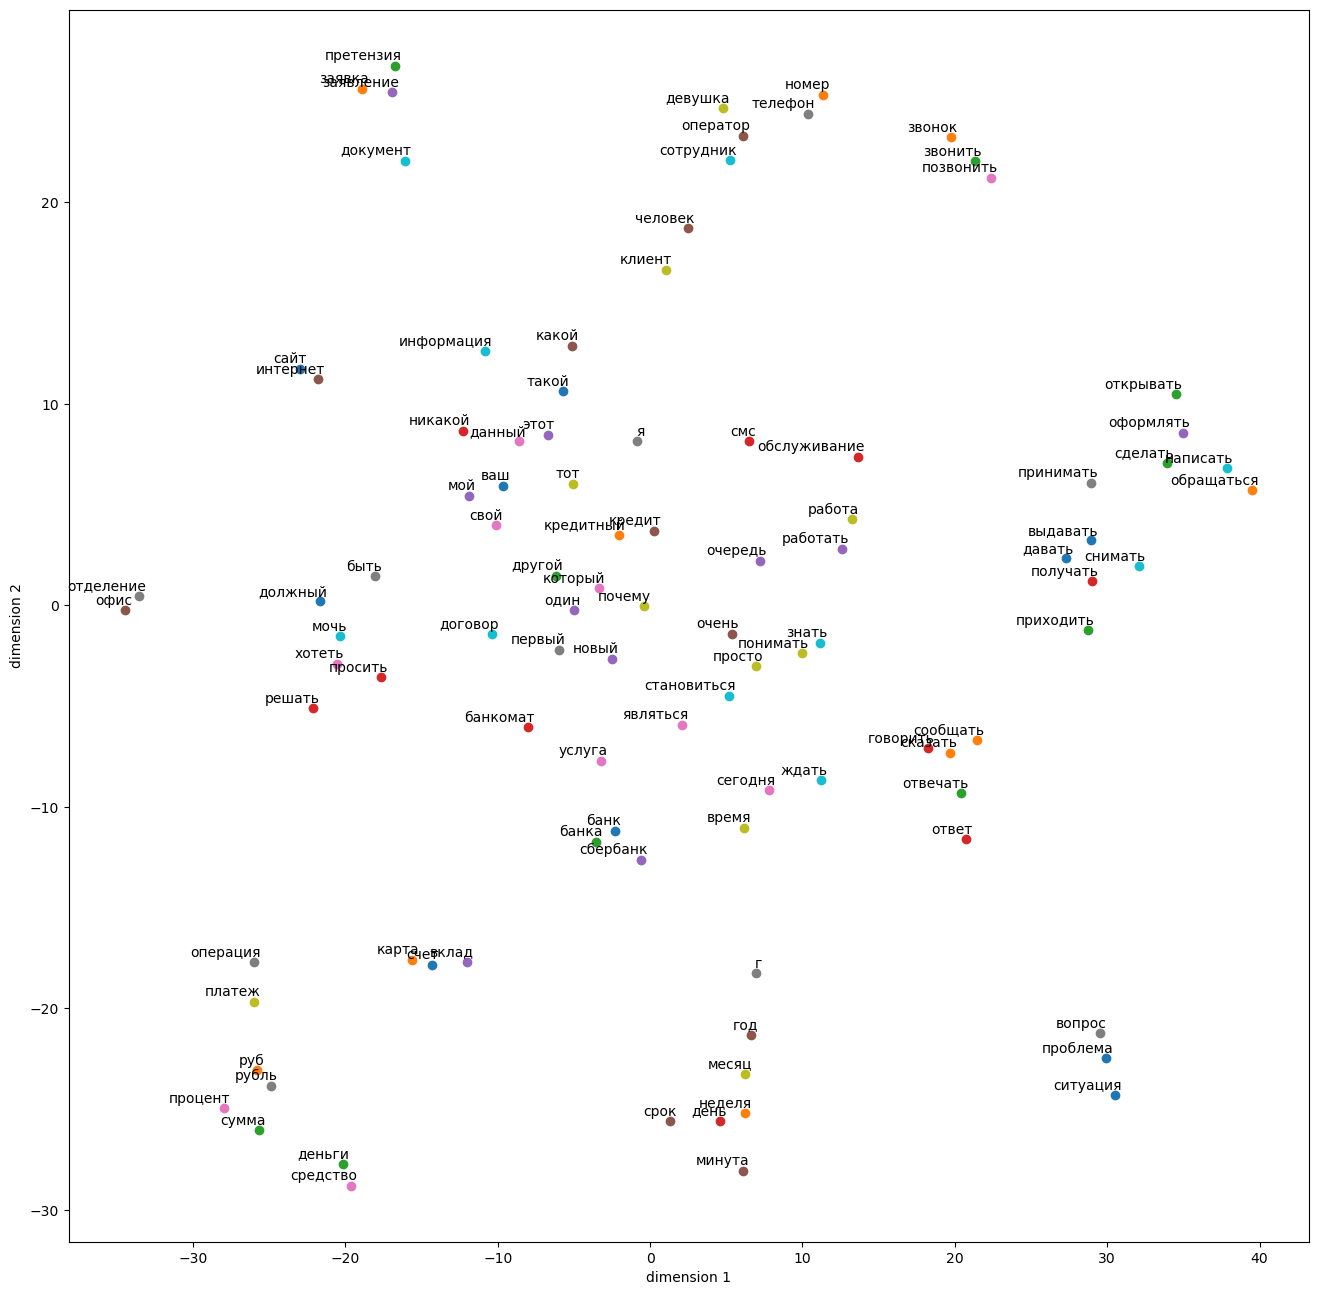

In [ ]:
tsne_plot(model, 100)

In [ ]:
# задайте координаты для нового пространства следующим образом: одна ось описывает отношение «плохо — хорошо», вторая — «медленно — быстро»,
# и найдите координаты названий банков в этих координатах

# !! тут я не понял как сделать. word2viz?

In [ ]:
# Определите 5–8 позитивных слов (например, быстрый, удобный) и 5–8 негативных слов (например, очередь, медленно). Эти слова будут основной будущего оценочного словаря

wpos = ['быстрый', 'удобный', 'вежливый', 'просто', 'сделать', 'выдать'  ]
wneg = ['медленно', 'очередь', 'опоздание', 'отказ', 'задержать', 'проблема']

# 3. Пометьте выбранные слова в лексическом графе соответствующими метками
#  !! про лексический граф тоже не понял. В этом разделе кажется не было лексических графов? Про Label Propagation в графе тоже не нашел